# Morphology

In [1]:
% matplotlib inline
import scipy.ndimage.morphology as morph
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as plt_pe
import cv2

In [2]:
def plot_im_and_numbers(im, vmin=None, vmax=None,
                        x_start=None, x_end=None, y_start=None, y_end=None,
                        annotate=True, fname=None):
    """Plot an image and display the intensity values on the pixel"""
    inch_per_element = 1
    h, w = im.shape
    
    if vmin is None:
        vmin = np.min(im)
    if vmax is None:
        vmax = np.max(im)
    
    plt.figure(figsize=(h*inch_per_element, w*inch_per_element))
    
    # Plot image
    plt.imshow(im, cmap='gray', interpolation='none', vmin=vmin, vmax=vmax)
    
    #if (x_start is None) or (x_end is None) or (y_start is None) or (y_end is None):
    #    plt.axis('off')
    #else:
    #    plt.yticks(range(0, x_end-x_start, 2), range(x_start, x_end, 2))
    #    plt.xticks(range(0, y_end-y_start, 2), range(y_start, y_end, 2))
    
    # Draw pixel values
    if annotate:
        for x in range(h):
            for y in range(w):
                plt.annotate(str(im[x, y]), xy=(y, x), 
                             horizontalalignment='center',
                             verticalalignment='center',
                             color='white',
                             path_effects=[plt_pe.withStroke(linewidth=2, foreground='black')],
                             fontsize='xx-large')
    
    # Draw grid between pixels
    #plt.xticks(np.arange(0, im.shape[1]))
    plt.xticks(np.arange(0.5, im.shape[1] + 0.5), [])
    #plt.xaxis().set_ticks([]) # Hide tick labels
    #plt.yticks(np.arange(0, im.shape[0]))
    plt.yticks(np.arange(0.5, im.shape[0] + 0.5), [])
    #plt.yaxis().set_ticks([]) # Hide tick labels
    #plt.grid(b=True, which='minor', linestyle='-', color='gray')
    plt.grid(True)
    
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight', transparent=True)

## Dilation and erosion

In [3]:
def dilation_erosion(im, selem, invert_pad=False):
    """Compute dilation and erosion on a binary image with an odd structure element"""
    
    im = im.astype(bool)
    eroded_im = np.zeros_like(im)
    dilated_im = np.zeros_like(im)
    selem = selem.astype(bool)
    selem180 = np.rot90(selem, 2) # Rotate the structure element for dilation
    num_true_in_selem = selem.sum()
    h, w = im.shape
    p, q = selem.shape
    r = int((p - 1)/2)
    s = int((q - 1)/2)

    if invert_pad:
        padded_im = np.ones((h + 2*r, w + 2*s), dtype=bool)
    else:
        padded_im = np.zeros((h + 2*r, w + 2*s), dtype=bool)
    padded_im[r:h+r, s:w+s] = im
    
    for x in range(h):
        for y in range(w):
            pad_x = x + r
            pad_y = y + s
            loc_im = padded_im[pad_x-r:pad_x+r+1, pad_y-s:pad_y+s+1].ravel()
            eroded_im[x, y] = (loc_im * selem.ravel()).sum() == num_true_in_selem
            dilated_im[x, y] = (loc_im * selem180.ravel()).any()
            
    return dilated_im, eroded_im

### Test erosion

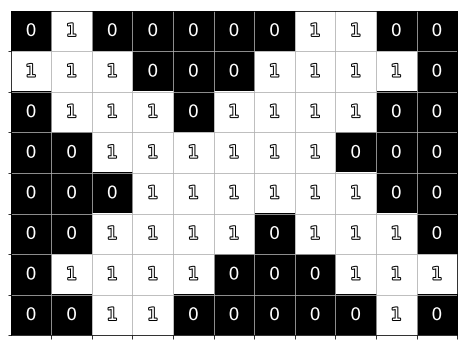

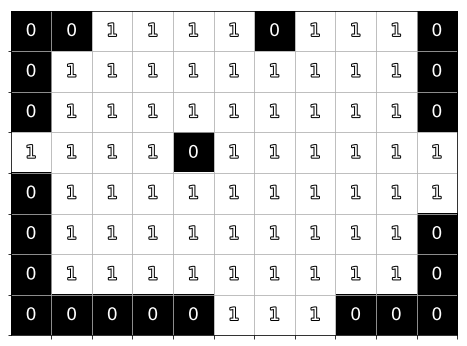

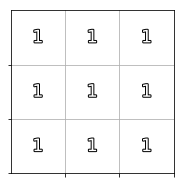

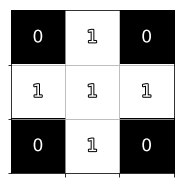

In [4]:
f1 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
               [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
               [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
               [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
               [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
               [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]])
f2 = np.array([[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
               [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
               [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
               [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
               [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]])
s1 = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])
s2 = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]])

plot_im_and_numbers(f1, fname='assets/images/f1.png')
plot_im_and_numbers(f2, fname='assets/images/f2.png')
plot_im_and_numbers(s1, fname='assets/images/s1.png', vmin=0, vmax=1)
plot_im_and_numbers(s2, fname='assets/images/s2.png')

In [5]:
dilation_11, erosion_11 = dilation_erosion(f1, s1)
dilation_12, erosion_12 = dilation_erosion(f1, s2)
dilation_21, erosion_21 = dilation_erosion(f2, s1)
dilation_22, erosion_22 = dilation_erosion(f2, s2)
_, erosion_21_squared = dilation_erosion(erosion_21, s1)
_, erosion_22_squared = dilation_erosion(erosion_22, s2)

# Test implementation against scipy
assert np.array_equal(erosion_11, morph.binary_erosion(f1, s1))
assert np.array_equal(erosion_12, morph.binary_erosion(f1, s2))
assert np.array_equal(dilation_11, morph.binary_dilation(f1, s1))
assert np.array_equal(dilation_12, morph.binary_dilation(f1, s2))
assert np.array_equal(erosion_21, morph.binary_erosion(f2, s1))
assert np.array_equal(erosion_22, morph.binary_erosion(f2, s2))
assert np.array_equal(dilation_21, morph.binary_dilation(f2, s1))
assert np.array_equal(dilation_22, morph.binary_dilation(f2, s2))

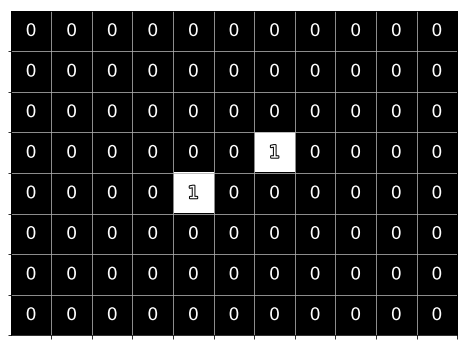

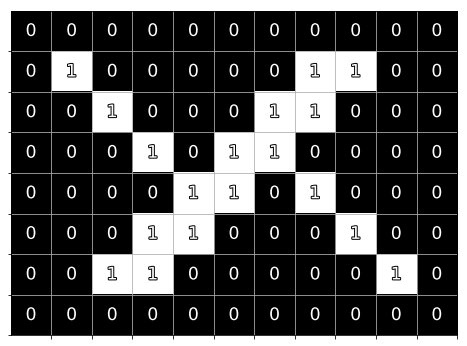

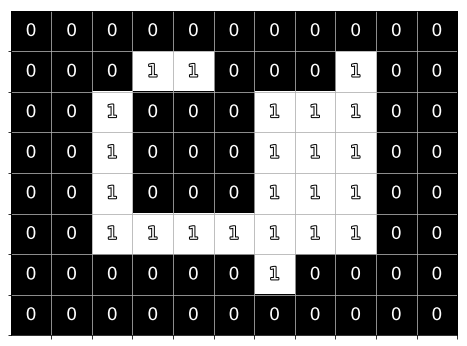

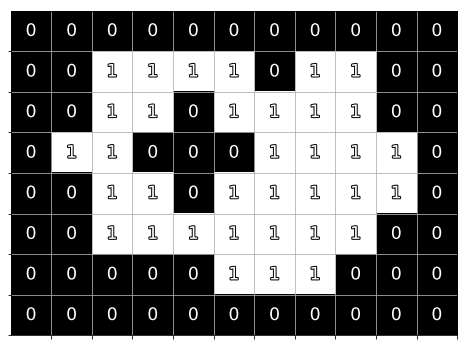

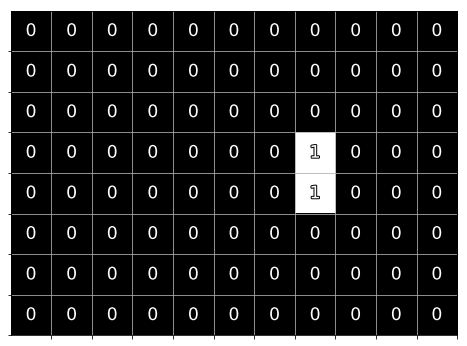

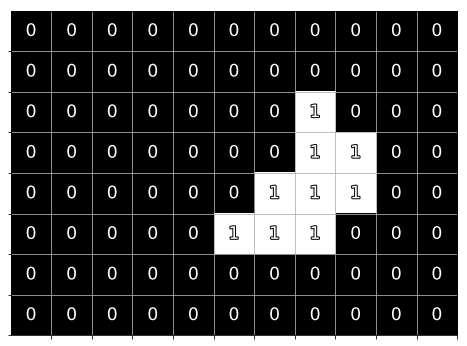

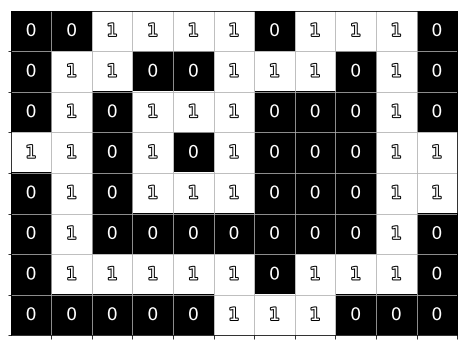

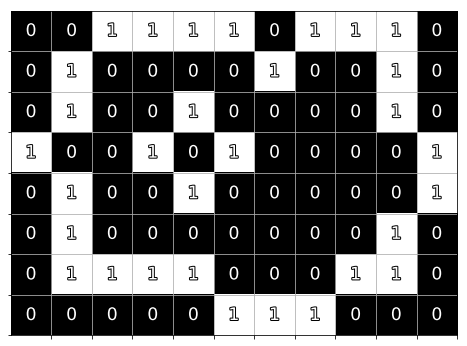

In [6]:
plot_im_and_numbers(erosion_11.astype(int), fname='assets/images/erosion_11.png')
plot_im_and_numbers(erosion_12.astype(int), fname='assets/images/erosion_12.png')
plot_im_and_numbers(erosion_21.astype(int), fname='assets/images/erosion_21.png')
plot_im_and_numbers(erosion_22.astype(int), fname='assets/images/erosion_22.png')
plot_im_and_numbers(erosion_21_squared.astype(int), fname='assets/images/erosion_21_squared.png')
plot_im_and_numbers(erosion_22_squared.astype(int), fname='assets/images/erosion_22_squared.png')
plot_im_and_numbers(f2 - erosion_21.astype(int), fname='assets/images/erosion_21_diff.png')
plot_im_and_numbers(f2 - erosion_22.astype(int), fname='assets/images/erosion_22_diff.png')

In [7]:
# Edge detection on larger image using erosion

shape_im = (cv2.imread('assets/images/bin_shapes.png', cv2.IMREAD_GRAYSCALE)/255).astype(int)

# Using scipy since it is faster
eroded_shapes_1 = morph.binary_erosion(shape_im, s1)
eroded_shapes_2 = morph.binary_erosion(shape_im, s2)

shape_ero_edge_1 = shape_im - eroded_shapes_1
shape_ero_edge_2 = shape_im - eroded_shapes_2

True

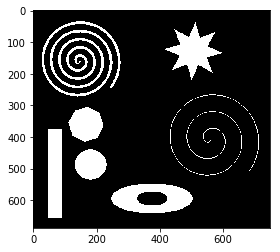

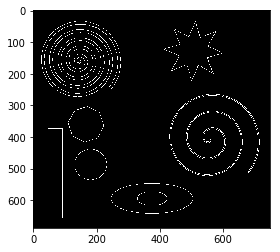

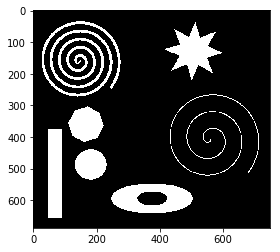

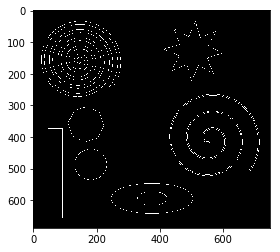

In [8]:
plt.figure(0)
plt.imshow(eroded_shapes_1, cmap='gray')
plt.figure(1)
plt.imshow(shape_ero_edge_1, cmap='gray')
plt.figure(2)
plt.imshow(eroded_shapes_2, cmap='gray')
plt.figure(3)
plt.imshow(shape_ero_edge_2, cmap='gray')

cv2.imwrite('assets/images/shape_ero_edge_1.png', 255*shape_ero_edge_1)
cv2.imwrite('assets/images/shape_ero_edge_2.png', 255*shape_ero_edge_2)

### Test dilation

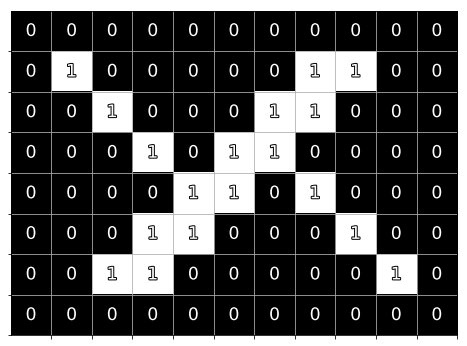

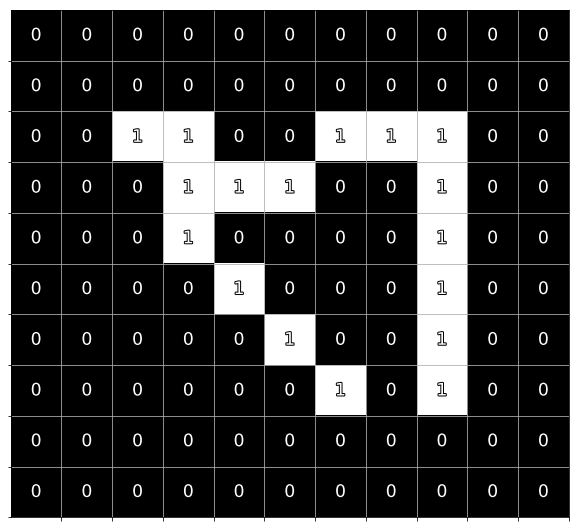

In [9]:
f3 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
               [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
               [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
               [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
f4 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
               [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
               [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

plot_im_and_numbers(f3, fname='assets/images/f3.png')
plot_im_and_numbers(f4, fname='assets/images/f4.png')

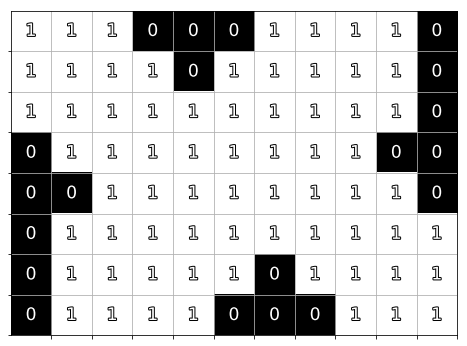

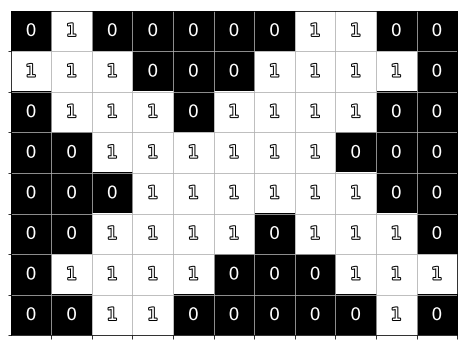

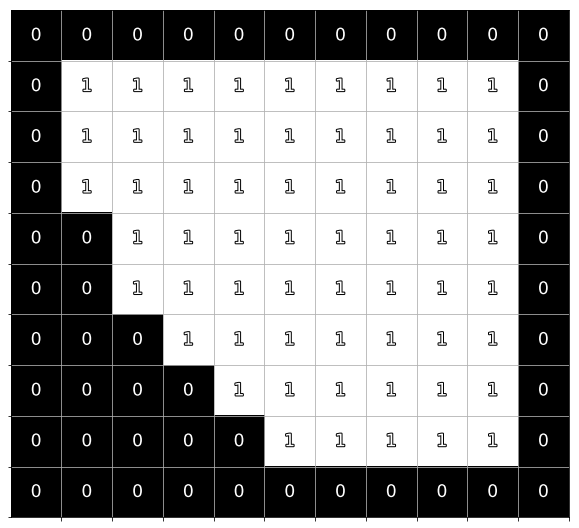

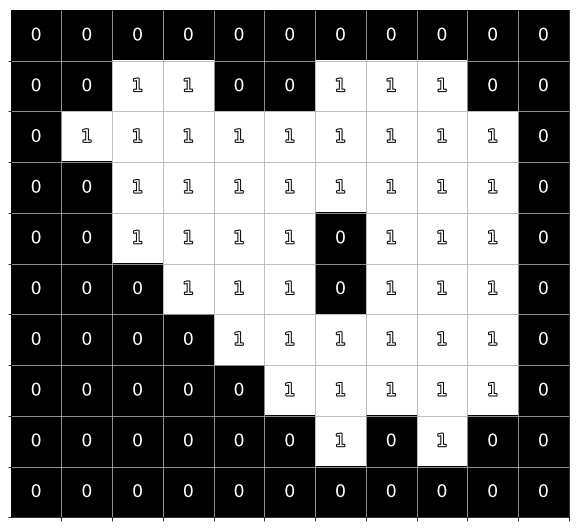

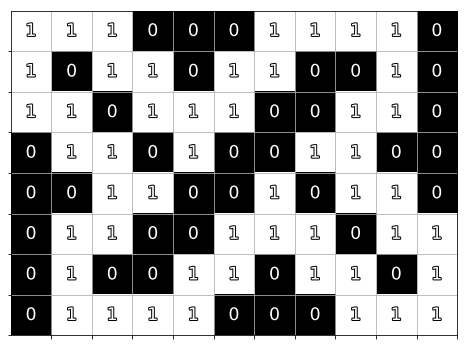

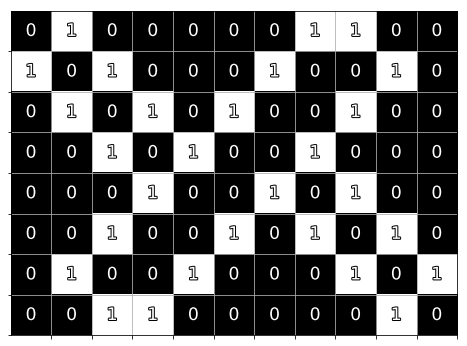

In [10]:
dilation_31, _ = dilation_erosion(f3, s1)
dilation_32, _ = dilation_erosion(f3, s2)
dilation_41, _ = dilation_erosion(f4, s1)
dilation_42, _ = dilation_erosion(f4, s2)

plot_im_and_numbers(dilation_31.astype(int), fname='assets/images/dilation_31.png')
plot_im_and_numbers(dilation_32.astype(int), fname='assets/images/dilation_32.png')
plot_im_and_numbers(dilation_41.astype(int), fname='assets/images/dilation_41.png')
plot_im_and_numbers(dilation_42.astype(int), fname='assets/images/dilation_42.png')
plot_im_and_numbers(dilation_31.astype(int) - f3, fname='assets/images/dilation_31_diff.png')
plot_im_and_numbers(dilation_32.astype(int) - f3, fname='assets/images/dilation_32_diff.png')

In [11]:
# Edge detection on larger image using dilation

# Using scipy since it is faster
dilated_shapes_1 = morph.binary_dilation(shape_im, s1)
dilated_shapes_2 = morph.binary_dilation(shape_im, s2)

shape_dil_edge_1 = dilated_shapes_1 - shape_im
shape_dil_edge_2 = dilated_shapes_2 - shape_im

True

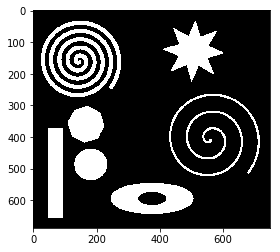

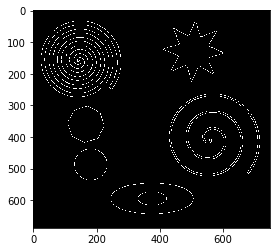

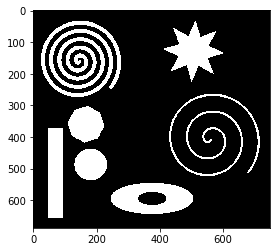

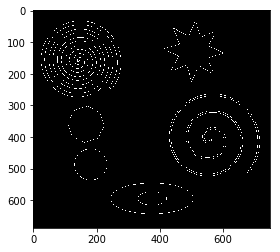

In [12]:
plt.figure(0)
plt.imshow(dilated_shapes_1, cmap='gray')
plt.figure(1)
plt.imshow(shape_dil_edge_1, cmap='gray')
plt.figure(2)
plt.imshow(dilated_shapes_2, cmap='gray')
plt.figure(3)
plt.imshow(shape_dil_edge_2, cmap='gray')

cv2.imwrite('assets/images/shape_dil_edge_1.png', 255*shape_dil_edge_1)
cv2.imwrite('assets/images/shape_dil_edge_2.png', 255*shape_dil_edge_2)

## Region filling

This is a region growing technique that can be used to fill holes, or to extract connected foreground components.

In [13]:
def region_growing(bin_image, selem, init_point):
    """Grow a region from an initial point
    
    Args:
        bin_image: A 2D binary image, values in {0, 1}.
        selem: A 2D binary structure element, plus-shaped or square, values in {0, 1}.
        init_point: 2D tuple of integers (x, y). Starting point of the region growing
        
    Returns:
        filled_regions: A list of 2D binary image of same shape as bin_image.
    """
    
    current_fill = np.zeros_like(bin_image)
    current_fill[init_point[0], init_point[1]] = 1
    
    filled_regions = [current_fill]
    
    while True:
        next_fill = (morph.binary_dilation(current_fill, selem) * bin_image.astype(bool)).astype(int)
        if np.array_equal(current_fill, next_fill):
            break
        else:
            current_fill = next_fill
            filled_regions.append(current_fill)
    
    return filled_regions

### Examples

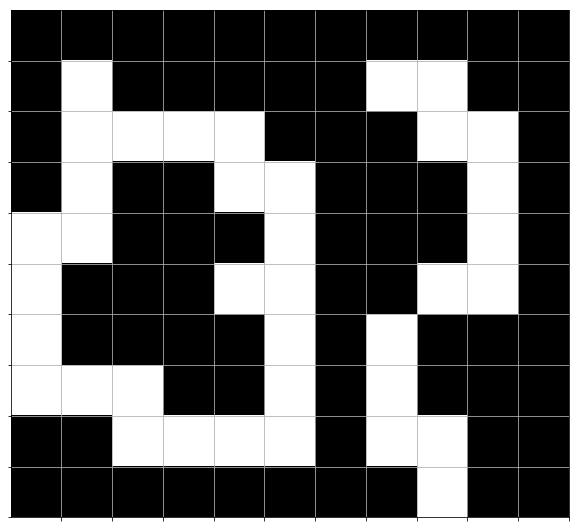

In [14]:
f = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
              [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0],
              [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
              [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
              [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
              [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
              [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
              [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

plot_im_and_numbers(f, annotate=False, fname='assets/images/region_im.png')

#### Find the connected components of f using a square structuring element

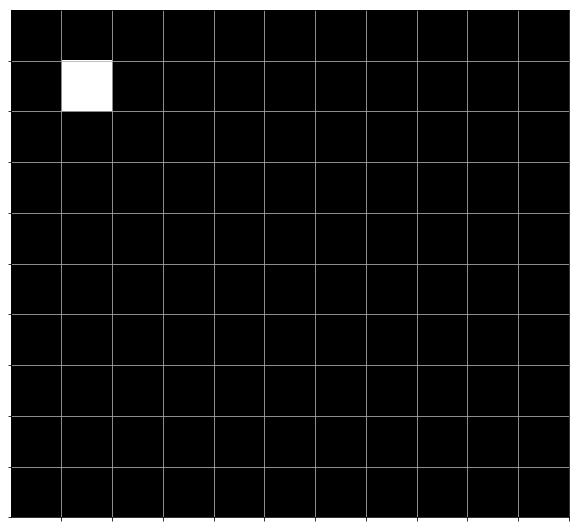

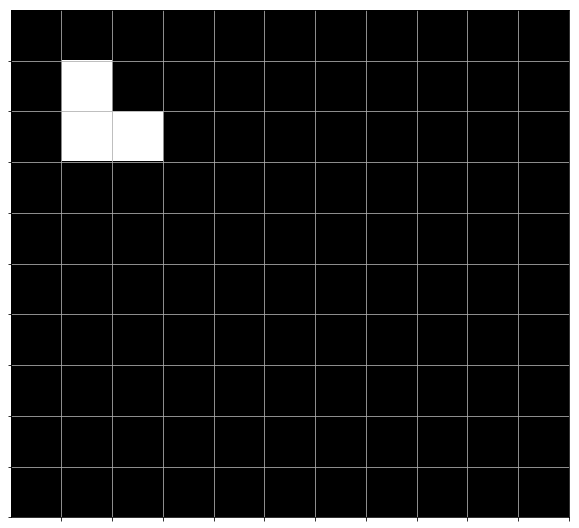

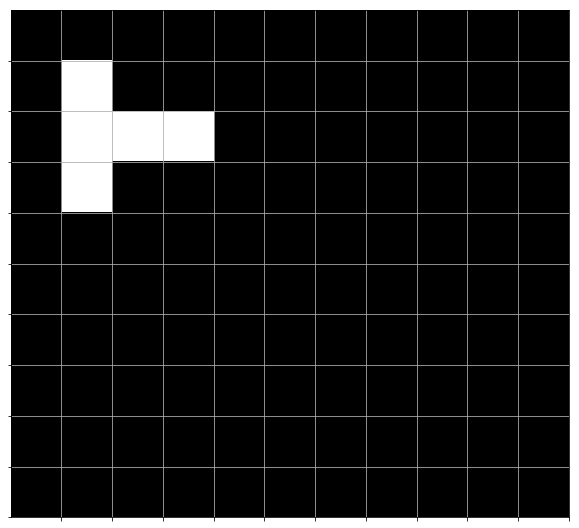

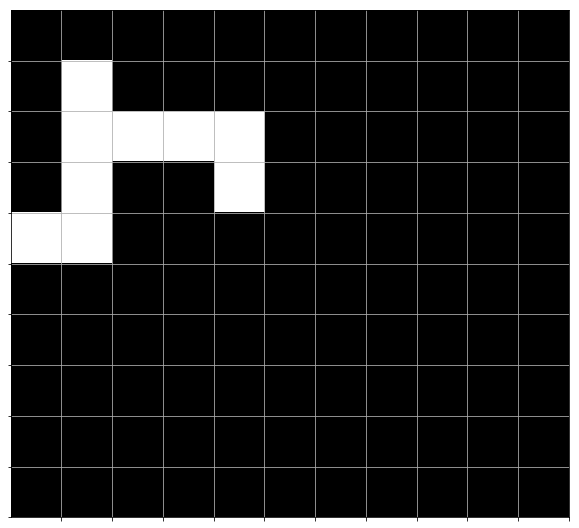

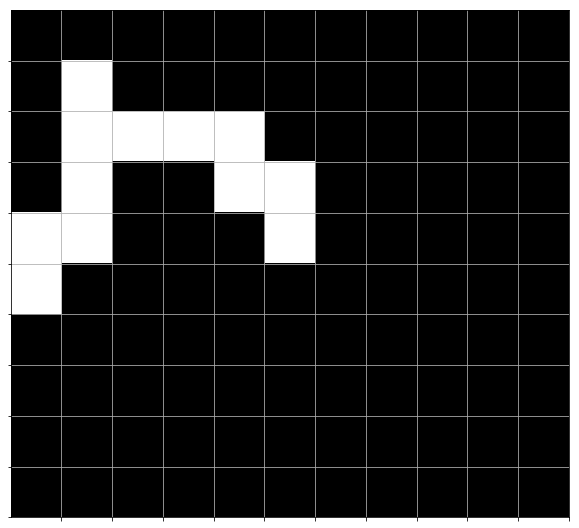

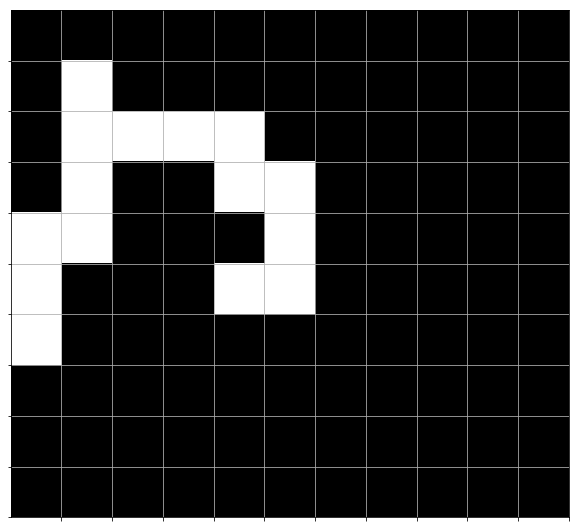

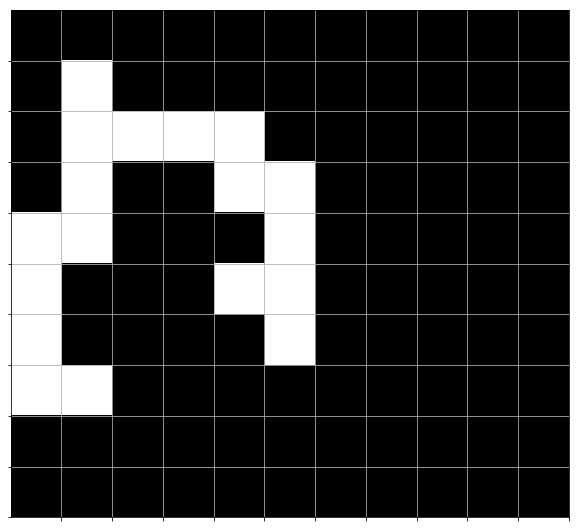

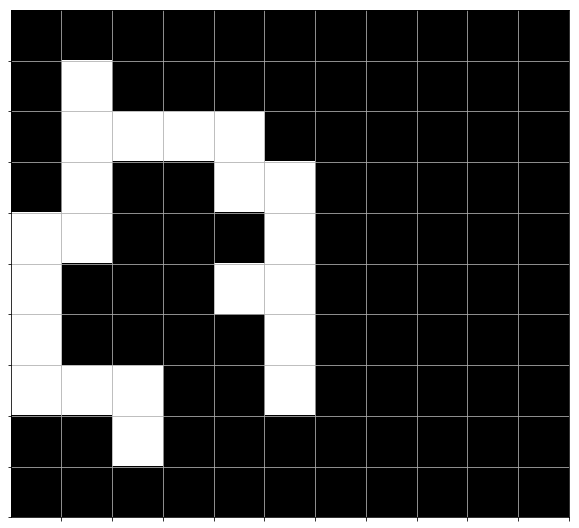

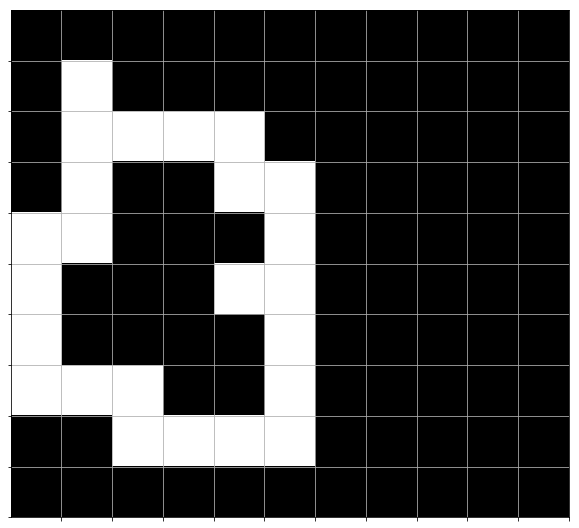

In [15]:
# Leftmost structure
left_connected = region_growing(f, s1, (1, 1))

for ind, fill_iter_im in enumerate(left_connected):
    plot_im_and_numbers(fill_iter_im, annotate=False, fname='assets/images/connected_left_{}.png'.format(ind))

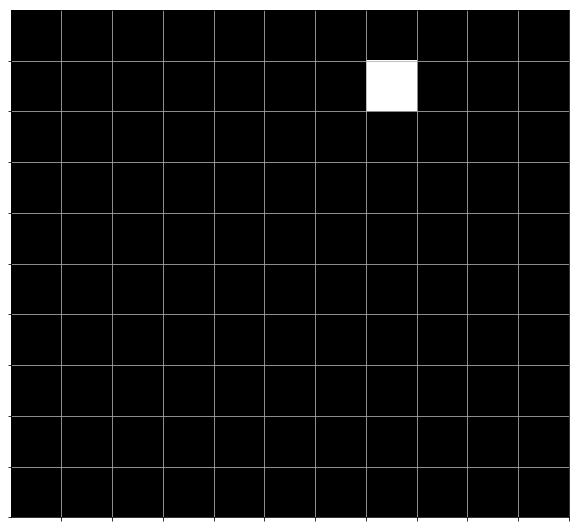

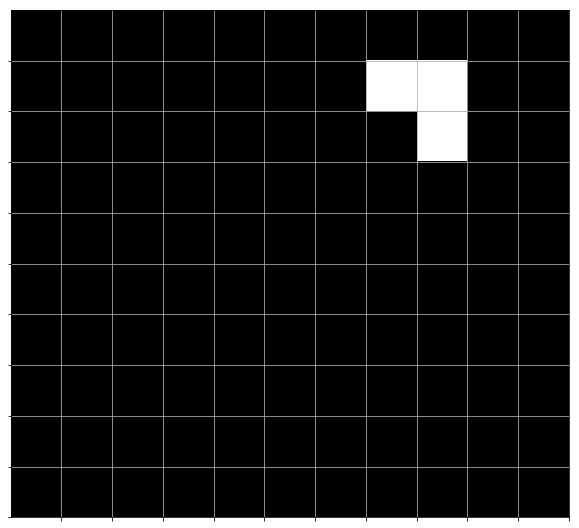

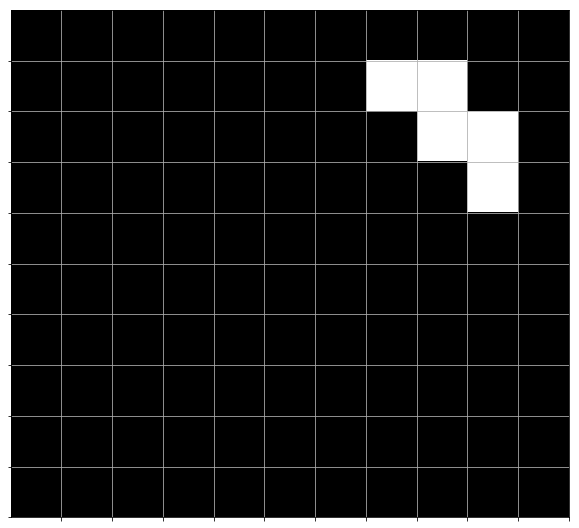

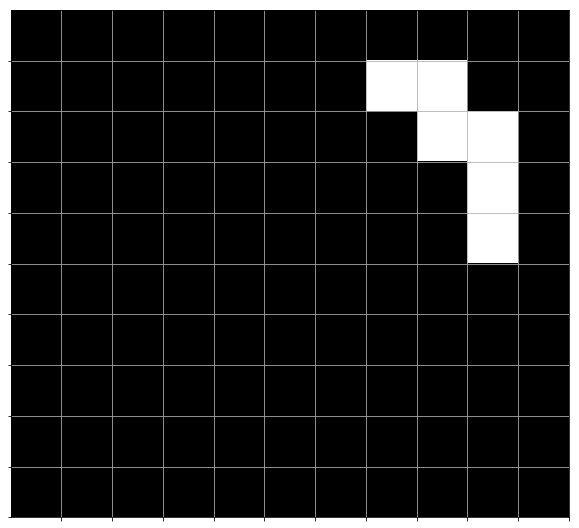

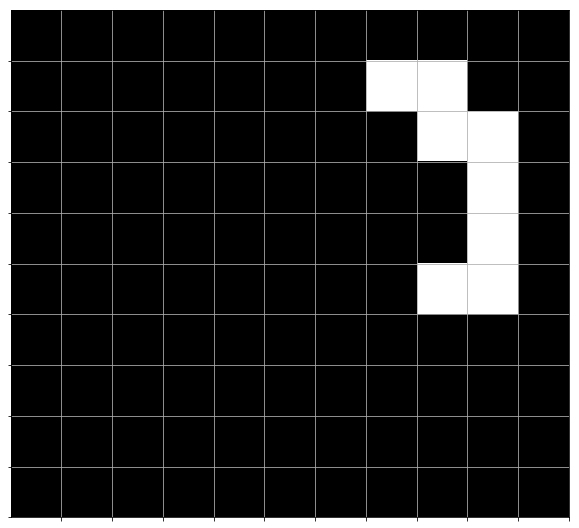

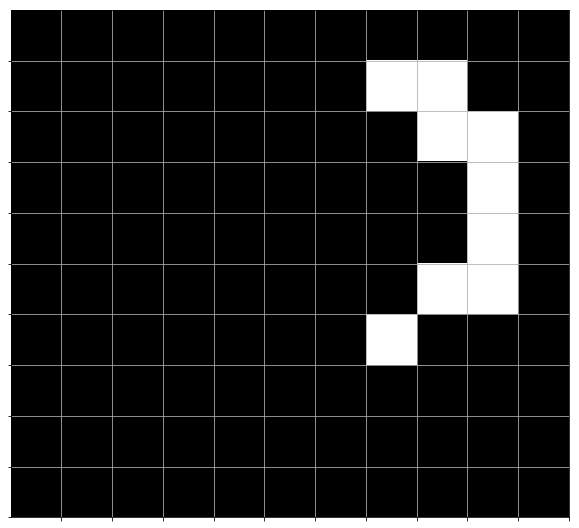

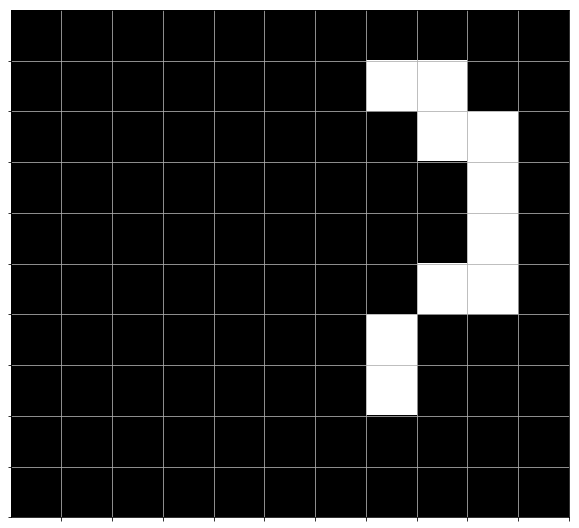

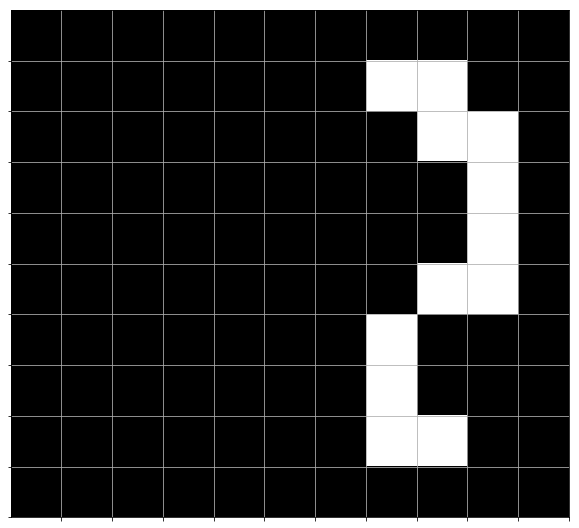

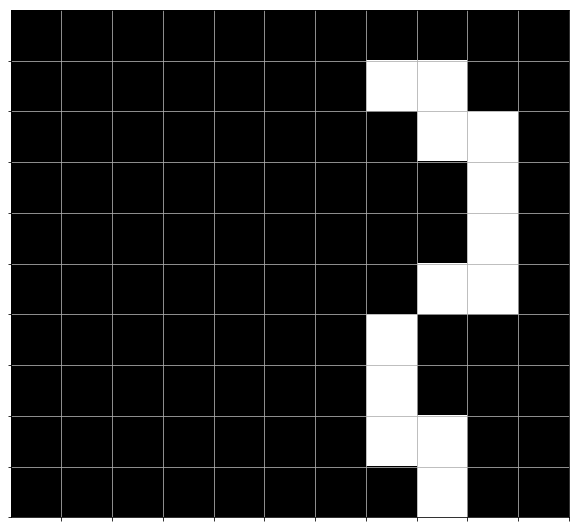

In [16]:
# Rightmost structure
right_connected = region_growing(f, s1, (1, 7))

for ind, fill_iter_im in enumerate(right_connected):
    plot_im_and_numbers(fill_iter_im, annotate=False, fname='assets/images/connected_right_{}.png'.format(ind))

#### Fill the region inside the leftmost structure

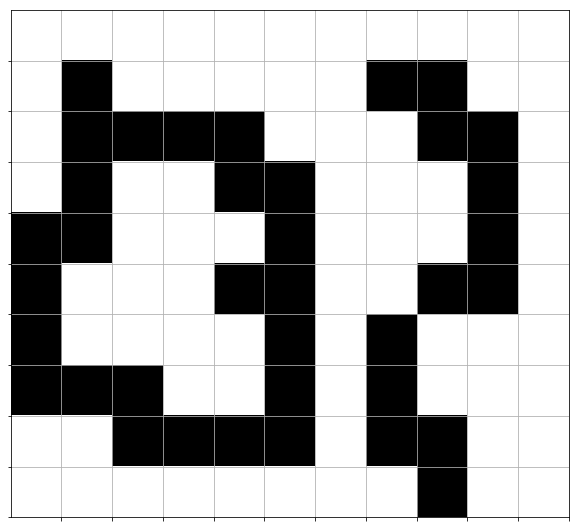

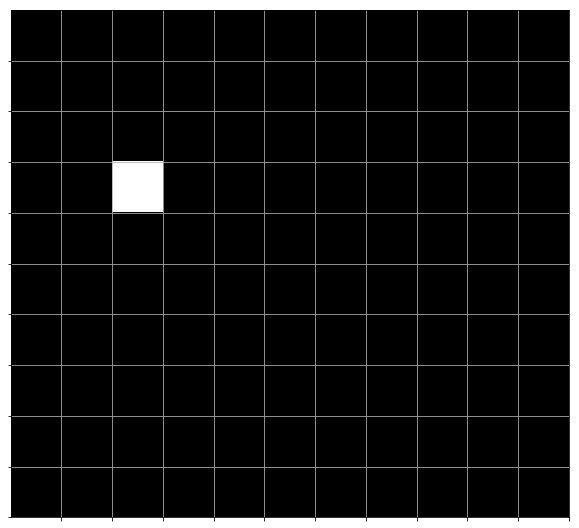

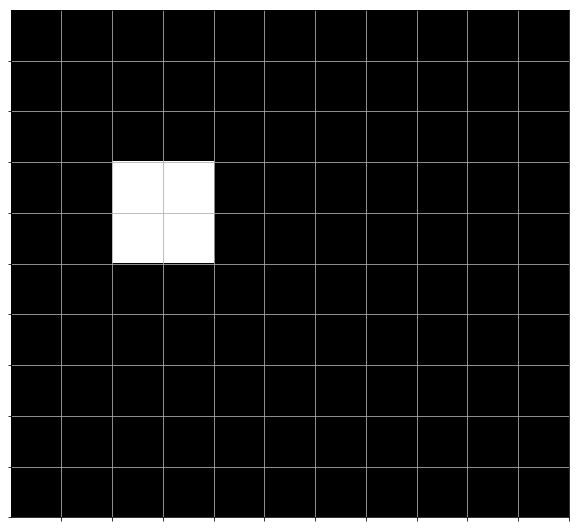

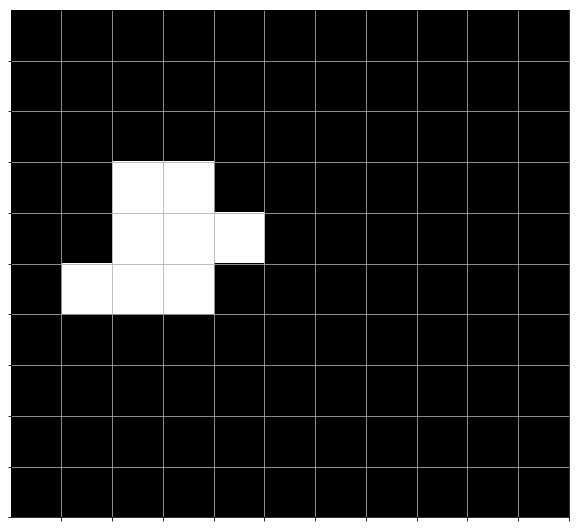

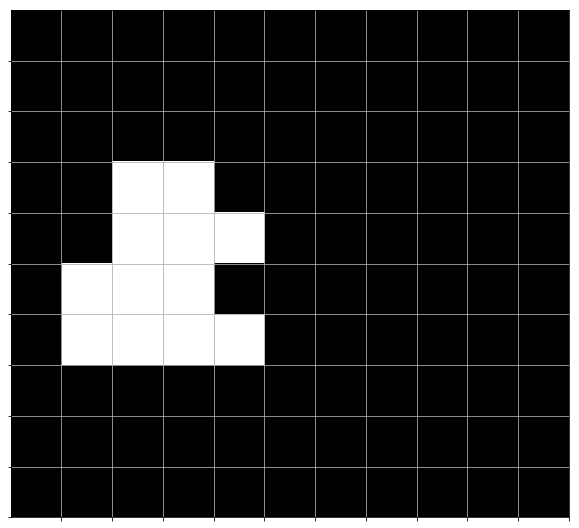

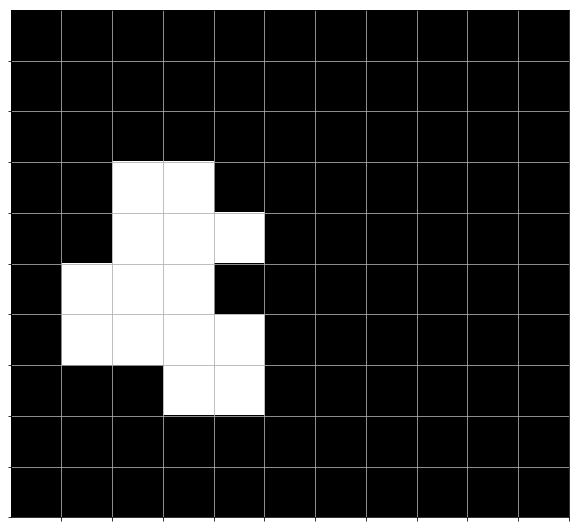

In [17]:
f_c = 1 - f # Complement of f
plot_im_and_numbers(f_c, annotate=False, fname='assets/images/region_complement.png')

left_hole = region_growing(f_c, s1, (3, 2))

for ind, fill_iter_im in enumerate(left_hole):
    plot_im_and_numbers(fill_iter_im, annotate=False, fname='assets/images/hole_{}.png'.format(ind))

## Duality of dilation and erosion

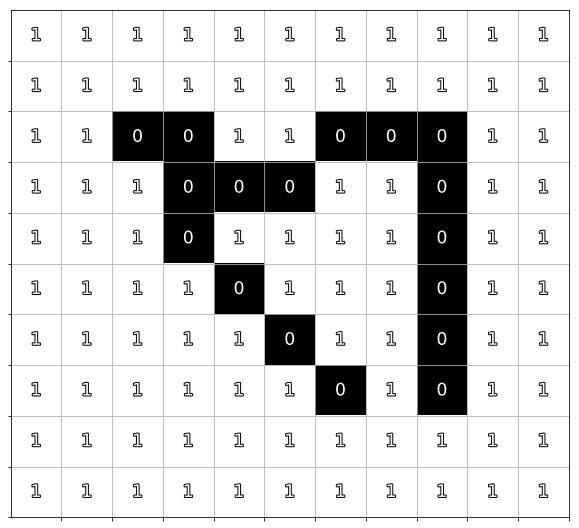

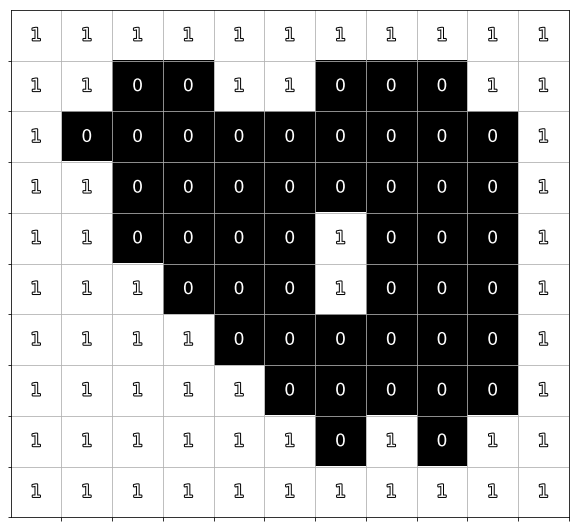

In [18]:
f4_c = 1 - f4
plot_im_and_numbers(f4_c, fname='assets/images/f4c.png')

# The complement of dilated_42 is
#_, eroded_42_c = dilation_erosion(f4_c, s2, invert_pad=True)
eroded_42_c = morph.binary_erosion(f4_c, s2, border_value=1)
plot_im_and_numbers(eroded_42_c.astype(int), fname='assets/images/eroded_42c.png')

## Opening

In [19]:
def opening(bin_image, selem, border_value=0):
    """Morphological opening"""
    return morph.binary_dilation(morph.binary_erosion(bin_image, selem, border_value=border_value), selem)

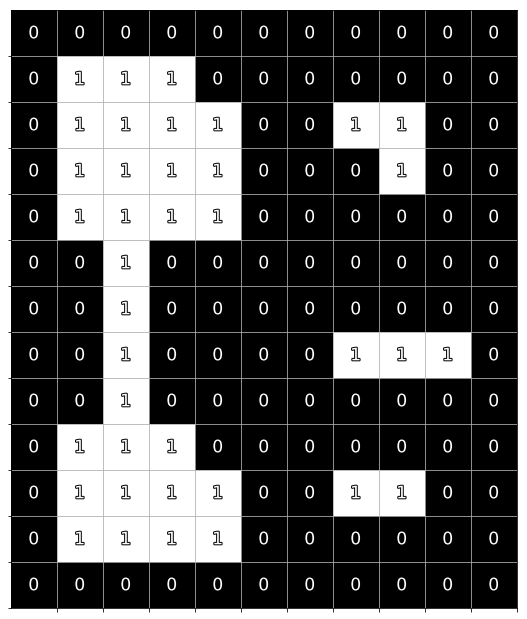

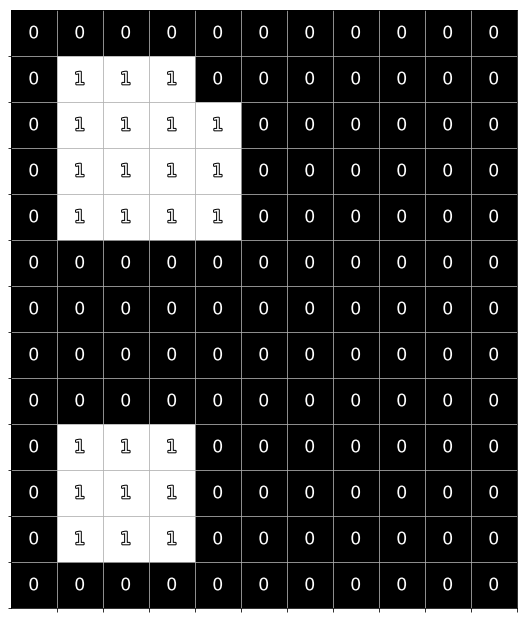

In [20]:
foc = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0],
                [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0],
                [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0],
                [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
plot_im_and_numbers(foc, fname='assets/images/foc.png')
plot_im_and_numbers(opening(foc, s1).astype(int), fname='assets/images/my_opening.png')

## Closing

In [21]:
def closing(bin_image, selem, border_value=0):
    """Morphological closing"""
    return morph.binary_erosion(morph.binary_dilation(bin_image, selem), selem, border_value=border_value)

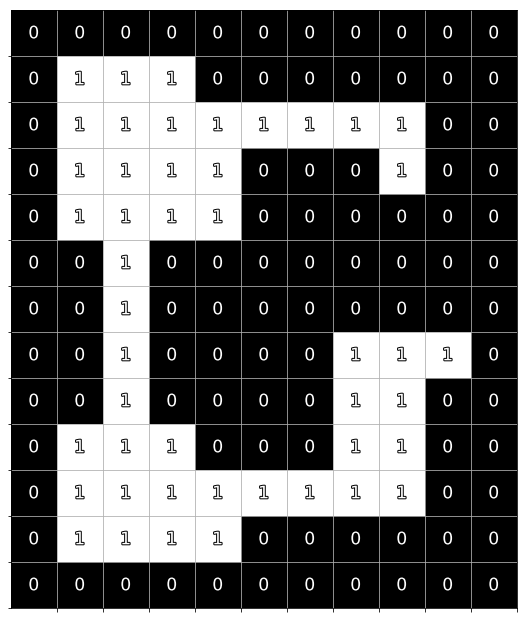

In [22]:
plot_im_and_numbers(closing(foc, s1).astype(int), fname='assets/images/my_closing.png')

## Duality between opening and closing

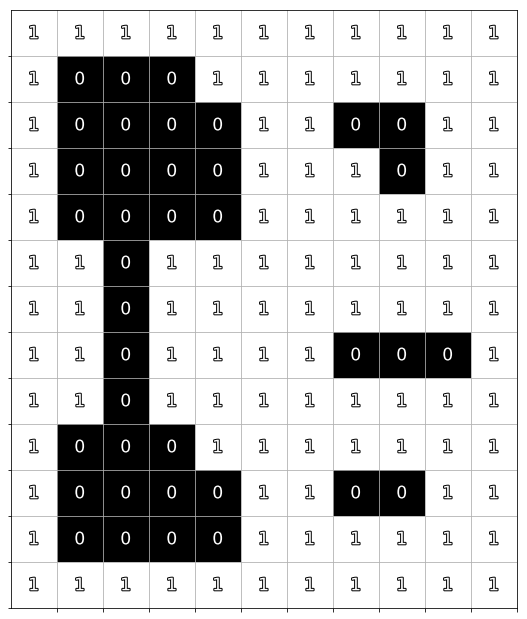

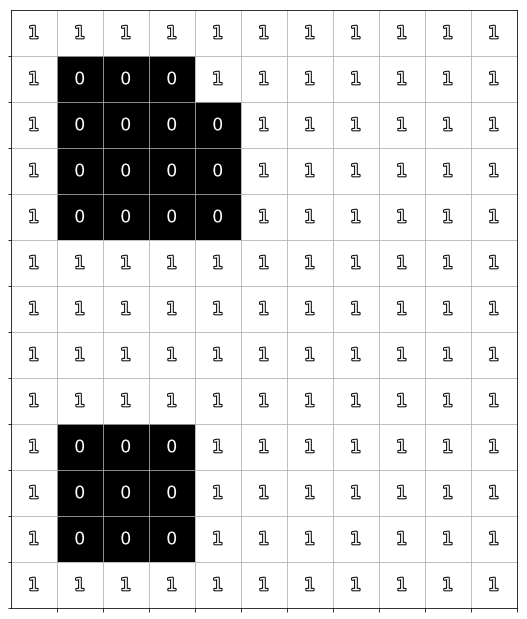

In [23]:
foc_c = 1 - foc
plot_im_and_numbers(foc_c, fname='assets/images/foc_c.png')
plot_im_and_numbers(closing(foc_c, s1, border_value=1).astype(int), fname='assets/images/my_opening_c.png')

## Opening and closing examples

True

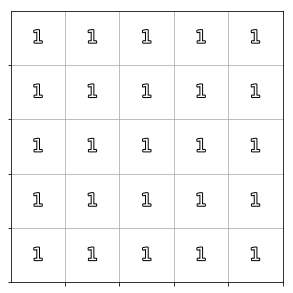

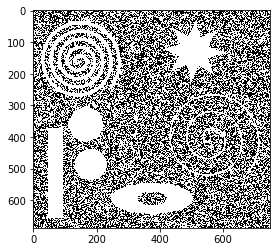

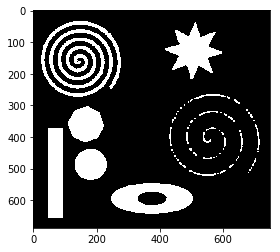

In [24]:
noisy_shape_im = np.clip(shape_im + np.random.randint(0, 2, (shape_im.shape[0], shape_im.shape[1])), 0, 1)
s = np.ones((5, 5), dtype=int)
opened_noisy = opening(noisy_shape_im, s)
plot_im_and_numbers(s, vmin=0, vmax=1, fname='assets/images/s55.png')
plt.figure(2)
plt.imshow(noisy_shape_im, cmap='gray', interpolation='none')
cv2.imwrite('assets/images/noisy_shape_im.png', 255*noisy_shape_im)
plt.figure(3)
plt.imshow(opened_noisy, cmap='gray', interpolation='none')
cv2.imwrite('assets/images/opened_noisy.png', 255*opened_noisy)

## Hit-or-miss transformation

In [25]:
def hit_or_miss(bin_image, s1, s2):
    """Perform the hit-or-miss transformation"""
    bin_image_c = 1 - bin_image
    first_erosion = morph.binary_erosion(bin_image, s1)
    second_erosion = morph.binary_erosion(bin_image_c, s2, border_value=1)
    intersection = first_erosion * second_erosion
    return intersection, first_erosion, second_erosion

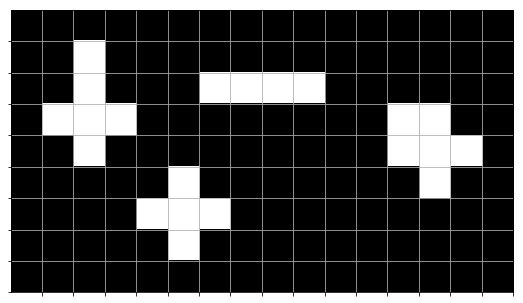

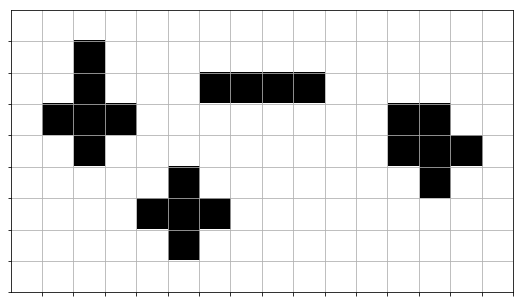

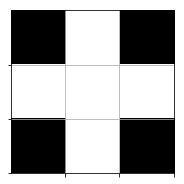

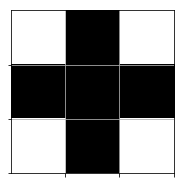

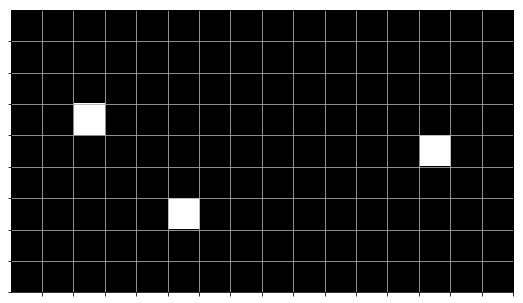

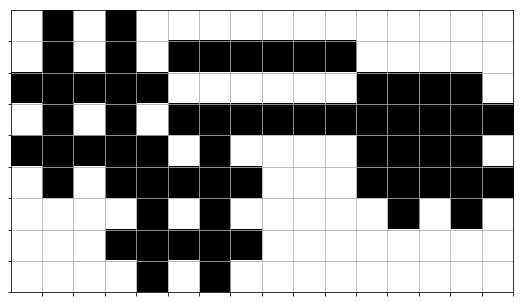

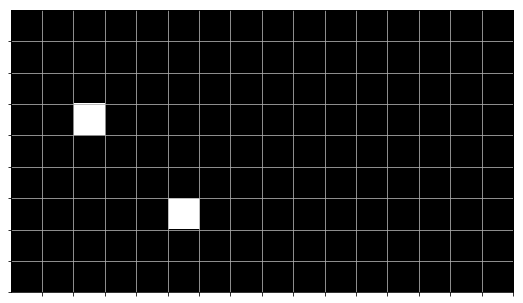

In [26]:
f = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
              [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
f_c = 1 - f

sa = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]])
sb = 1 - sa

hitmiss_result, ero_1, ero_2 = hit_or_miss(f, sa, sb)

plot_im_and_numbers(f, annotate=False, fname='assets/images/hitmiss_f.png')
plot_im_and_numbers(f_c, annotate=False, fname='assets/images/hitmiss_fc.png')
plot_im_and_numbers(sa, annotate=False, fname='assets/images/hitmiss_sa.png')
plot_im_and_numbers(sb, annotate=False, fname='assets/images/hitmiss_sb.png')
plot_im_and_numbers(ero_1, annotate=False, fname='assets/images/hitmiss_ero1.png')
plot_im_and_numbers(ero_2, annotate=False, fname='assets/images/hitmiss_ero2.png')
plot_im_and_numbers(hitmiss_result, annotate=False, fname='assets/images/hitmiss_res.png')

## Region thinning

In [31]:
def thinning(bin_image):
    """Perform region thinning of an image"""
    s_hits = []
    s_hits.append([[0, 0, 0],
                   [0, 1, 0],
                   [1, 1, 1]])
    s_hits.append([[0, 0, 0],
                   [1, 1, 0],
                   [1, 1, 0]])
    s_hits.append([[1, 0, 0],
                   [1, 1, 0],
                   [1, 0, 0]])
    s_hits.append([[1, 1, 0],
                   [1, 1, 0],
                   [0, 0, 0]])
    s_hits.append([[1, 1, 1],
                   [0, 1, 0],
                   [0, 0, 0]])
    s_hits.append([[0, 1, 1],
                   [0, 1, 1],
                   [0, 0, 0]])
    s_hits.append([[0, 0, 1],
                   [0, 1, 1],
                   [0, 0, 1]])
    s_hits.append([[0, 0, 0],
                   [0, 1, 1],
                   [0, 1, 1]])
    s_miss = []
    s_miss.append([[1, 1, 1],
                   [0, 0, 0],
                   [0, 0, 0]])
    s_miss.append([[0, 1, 1],
                   [0, 0, 1],
                   [0, 0, 0]])
    s_miss.append([[0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1]])
    s_miss.append([[0, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])
    s_miss.append([[0, 0, 0],
                   [0, 0, 0],
                   [1, 1, 1]])
    s_miss.append([[0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 0]])
    s_miss.append([[1, 0, 0],
                   [1, 0, 0],
                   [1, 0, 0]])
    s_miss.append([[1, 1, 0],
                   [1, 0, 0],
                   [0, 0, 0]])
    
    current_im = bin_image
    iter_images = []
    k = 0
    while True:
        k = k + 1
        this_iter_images = [current_im]
        next_im = current_im
        for s1, s2 in zip(s_hits, s_miss):
            hitormiss, _, _ = hit_or_miss(next_im, s1, s2)
            next_im = next_im * (1 - hitormiss.astype(int))
            this_iter_images.append(next_im)
        if np.array_equal(current_im, next_im):
            break
        else:
            iter_images.append(this_iter_images)
            current_im = next_im
    return next_im, iter_images

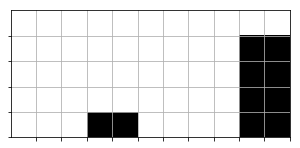

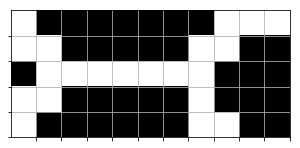

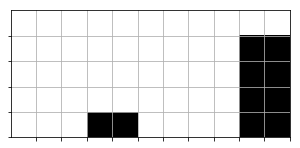

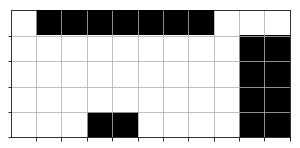

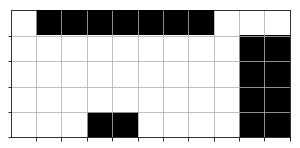

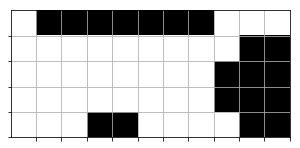

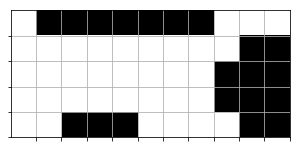

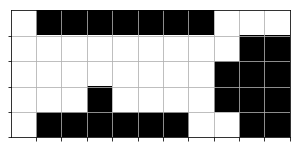

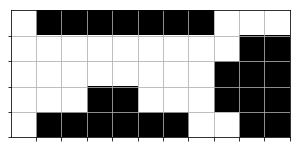

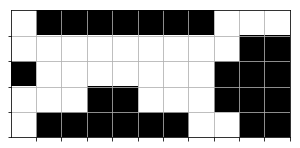

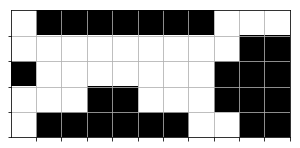

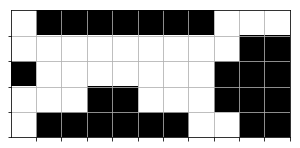

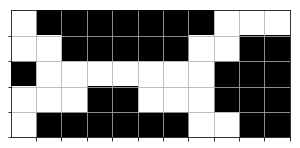

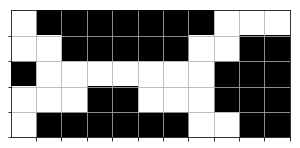

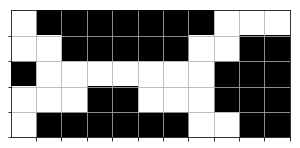

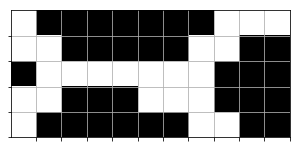

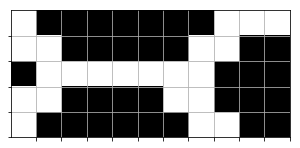

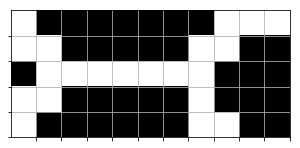

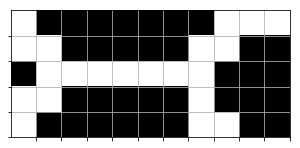

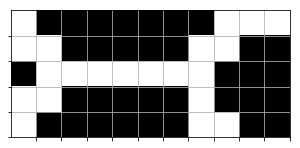

In [32]:
f = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
              [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]])
             
thinned_f, iter_images = thinning(f)

plot_im_and_numbers(f, annotate=False, fname='assets/images/thinning_f.png')
plot_im_and_numbers(thinned_f, annotate=False, fname='assets/images/thinning_thinned.png')

for k, intermediate_images in enumerate(iter_images):
    for i, inter_image in enumerate(intermediate_images):
        plot_im_and_numbers(inter_image, annotate=False, fname='assets/images/thinning_intermediate_{}_{}.png'.format(k, i))